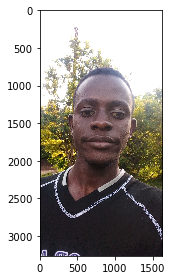

In [1]:
from skimage import io
import pandas as pd
from skimage import color
from skimage import data,io

from pylab import *

img=io.imread('jona.jpg')

io.imshow(img)

In [2]:
print(f"Type of the image :{type(img)}")
print(f"Shape of the image is: {img.shape} ")

Type of the image :<class 'numpy.ndarray'>
Shape of the image is: (3264, 1632, 3) 


In [3]:
# to look at the pixel values
#we convert the image (numpy array to an excel spreadsheet)

df=pd.DataFrame(img.flatten()) #converts the image into a one dimensional array and then a dataframe
#(RGB to one dimension)
excel_path='jona.xlsx'

# df.to_excel(excel_path,index=False)
df

,0
0,255
1,255
2,255
3,255
4,255
...,...
15980539,27
15980540,34
15980541,32
15980542,25


In [4]:
# converting rgb to hsv
from skimage import color
from skimage import data

from pylab import *

#converting to hsv
img_hsv=color.rgb2hsv(img)
#converting back to original
img_res=color.hsv2rgb(img_hsv)


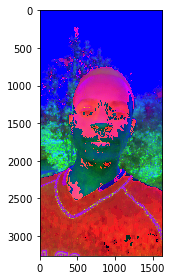

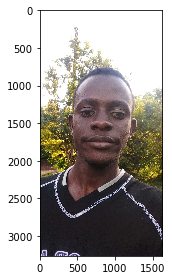

In [5]:
#show both images
figure(0)
io.imshow(img_hsv)
figure(1)
io.imshow(img_res)

/home/jod35/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


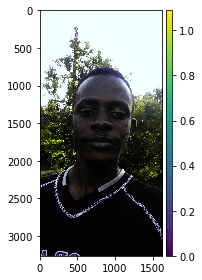

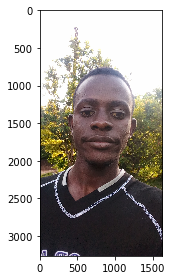

In [6]:
#converting to xyz and viceversa
img_xyz=color.rgb2xyz(img)
img_res=color.xyz2rgb(img_xyz)

#displaying the images
figure(0)
io.imshow(img_xyz)

figure(1)
io.imshow(img_res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


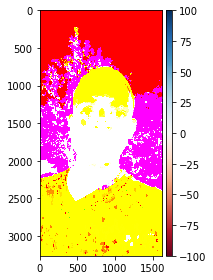

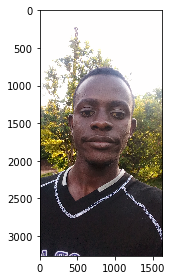

In [7]:
#rgb to lab
img_lab=color.rgb2lab(img)
img_res=color.lab2rgb(img_lab)

# displaying the images
figure(0)
io.imshow(img_lab)
figure(1)
io.imshow(img_res)

In [8]:
#yuv
img_yuv=color.rgb2yuv(img)
img_res=color.yuv2rgb(img_res)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


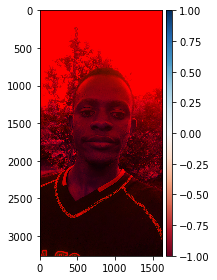

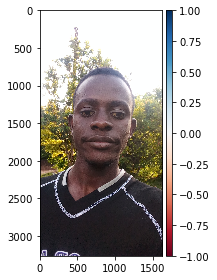

In [6]:
from skimage import color
from skimage import data,io

from pylab import *


img=io.imread('jona.jpg')




img_yuv=color.rgb2yuv(img)
img_res=color.yuv2rgb(img_yuv)


figure(0)
io.imshow(img_yuv)
figure(1)
io.imshow(img_res)

In [7]:
#saving an image
io.imsave("yuv.jpg",img_yuv)

Lossy conversion from float64 to uint8. Range [-0.3632338868627451, 0.9999999999999999]. Convert image to uint8 prior to saving to suppress this warning.


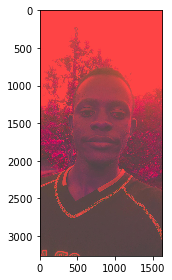

In [9]:
saved_img=io.imread('yuv.jpg')
io.imshow(saved_img)

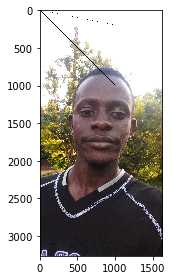

In [11]:
#drawing shapes
from skimage import draw

x,y=draw.line(0,0,200,1000)

img[x,y]=0

io.imshow(img)

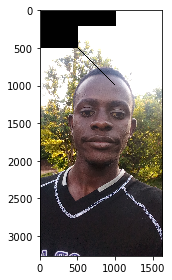

In [13]:
from skimage import draw

def rectangle(x,y,w,h):
    rr,cc=[x,x+w,x+w,x],[y,y,y+h,y+h]
    
    return draw.polygon(rr,cc)

rr,cc=rectangle(10,10,200,1000)

img[rr,cc]=1

io.imshow(img)

In [14]:
#rotating an image
from skimage.transform import rotate

rotated=rotate(img,30)

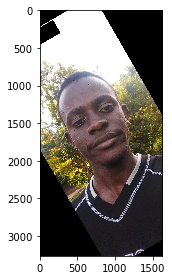

In [15]:
io.imshow(rotated)

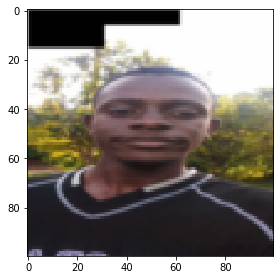

In [16]:
#resizing an image
from skimage.transform import resize

resized = resize(img,(100,100))
io.imshow(resized)

In [17]:
#determining sttuctural similarity between images
img_original=io.imread('jona.jpg')
img_yuv=io.imread('yuv.jpg')

from skimage.measure import compare_ssim as ssim

In [20]:
ssim_original=ssim(img_original,img_original,data_range=img_original.max()-img_original.min(),
                   multichannel=True)

ssim_different=ssim(img_original,img_yuv,data_range=img_yuv.max()-img_yuv.min(),multichannel=True)


print(ssim_original,ssim_different)

# the modified image is 62% different from the original



<ipython-input-20-87f217618a60>:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_original=ssim(img_original,img_original,data_range=img_original.max()-img_original.min(),
<ipython-input-20-87f217618a60>:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_different=ssim(img_original,img_yuv,data_range=img_yuv.max()-img_yuv.min(),multichannel=True)


1.0 0.6224932157598974
